## Importing Necessary Libraries

In [14]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Data Upload

In [3]:
train_data = pd.read_csv("train.csv")
df_train = train_data.copy()
test_data = pd.read_csv("test.csv")
df_test = test_data.copy()
#train_data.head()
#test_data.head()

In [4]:
print(df_train.shape, df_test.shape)

(1460, 81) (1459, 80)


In [5]:
print(tabulate(df_train.describe().T,headers=df_train.describe().T.columns,tablefmt="psql"))

+---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------+
|               |   count |           mean |          std |   min |       25% |      50% |       75% |    max |
|---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------|
| Id            |    1460 |    730.5       |   421.61     |     1 |    365.75 |    730.5 |   1095.25 |   1460 |
| MSSubClass    |    1460 |     56.8973    |    42.3006   |    20 |     20    |     50   |     70    |    190 |
| LotFrontage   |    1201 |     70.05      |    24.2848   |    21 |     59    |     69   |     80    |    313 |
| LotArea       |    1460 |  10516.8       |  9981.26     |  1300 |   7553.5  |   9478.5 |  11601.5  | 215245 |
| OverallQual   |    1460 |      6.09932   |     1.383    |     1 |      5    |      6   |      7    |     10 |
| OverallCond   |    1460 |      5.57534   |     1.1128   |     1 |      5    |      5   |      6    |  

In [6]:
pd.DataFrame(df_train.dtypes,columns=['Type']).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Type,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


### Data Type Conversion for Categorical Variables

In [7]:
df_train['MSZoning'] = df_train['MSZoning'].astype(CategoricalDtype())
df_train['Street'] = df_train['Street'].astype(CategoricalDtype())
df_train['Alley'] = df_train['Alley'].astype(CategoricalDtype())
df_train['LotShape'] = df_train['LotShape'].astype(CategoricalDtype())
df_train['OverallQual'] = df_train['OverallQual'].astype(CategoricalDtype()) #Included in Features
df_train['OverallCond'] = df_train['OverallCond'].astype(CategoricalDtype()) #Included in Features

df_test['MSZoning'] = df_test['MSZoning'].astype(CategoricalDtype())
df_test['Street'] = df_test['Street'].astype(CategoricalDtype())
df_test['Alley'] = df_test['Alley'].astype(CategoricalDtype())
df_test['LotShape'] = df_test['LotShape'].astype(CategoricalDtype())
df_test['OverallQual'] = df_test['OverallQual'].astype(CategoricalDtype()) #Included in Features
df_test['OverallCond'] = df_test['OverallCond'].astype(CategoricalDtype()) #Included in Features

In [8]:
df_train['MSZoning'].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]

## Visualizations to Explore the Data

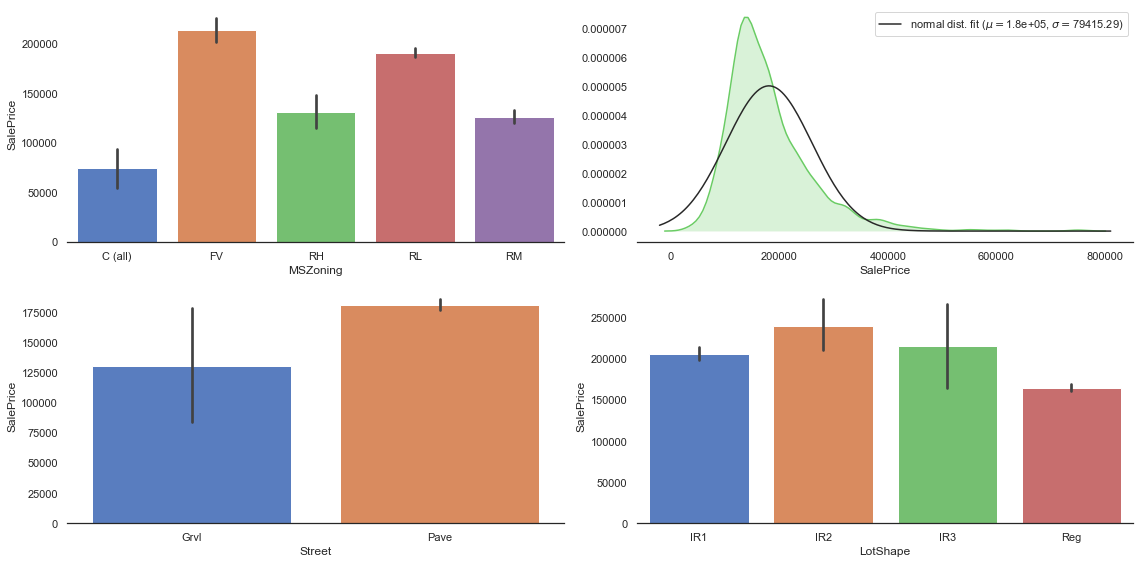

In [30]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='MSZoning',y='SalePrice',data=df_train, ax=axes[0, 0]);
# Plot a filled kernel density estimate
sns.distplot(df_train['SalePrice'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 1],
            fit=stats.norm);
#Gaussian Fit for Price Distribution
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
#print("mu={0}, sigma={1}".format(mu, sigma))
axes[0,1].legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)],loc="upper right")
# Plot a filled kernel density estimate
#sns.distplot(df_train['Street'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0]);
sns.barplot(x='Street',y='SalePrice',data=df_train, ax=axes[1, 0]);
sns.barplot(x='LotShape',y='SalePrice',data=df_train, ax=axes[1, 1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

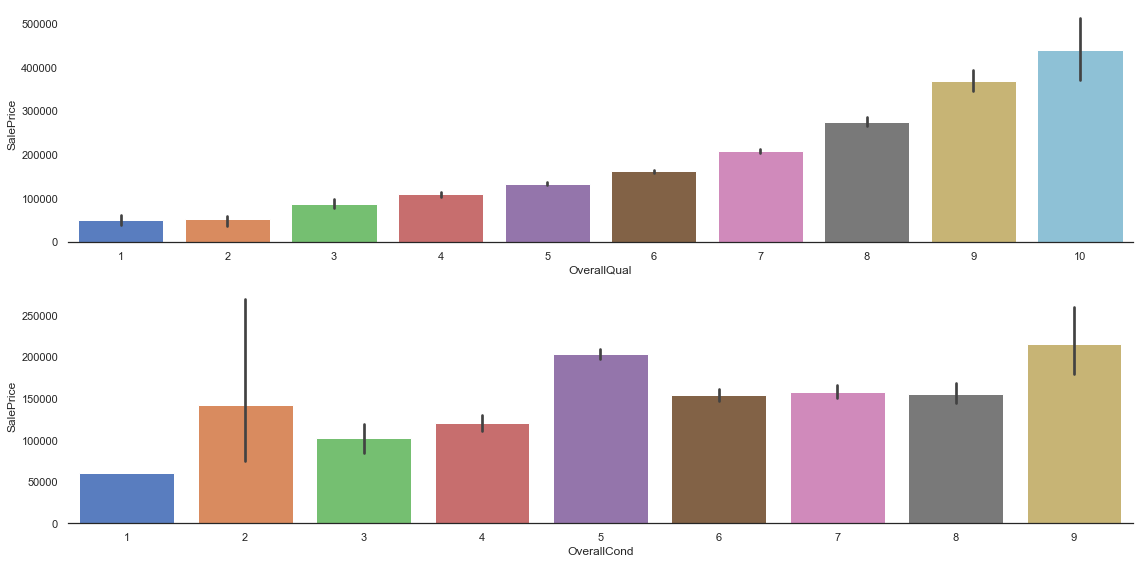

In [10]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='OverallQual',y='SalePrice',data=df_train, ax=axes[0]);
# Plot a filled kernel density estimate
sns.barplot(x='OverallCond',y='SalePrice',data=df_train, ax=axes[1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

# Feature Selection & Forming Train, Dev and Test Sets

In [18]:
Features = ['OverallCond','OverallQual']
X = df_train[Features]
y = df_train['SalePrice']
X_test = df_test[Features]

In [19]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape)

(1168, 2) (292, 2) (1459, 2) (1168,) (292,)


# ML Algorithms

## Linear Regression

In [21]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

#To retrieve the intercept:
    #print(linreg.intercept_)
#For retrieving the slope:
    #print(linreg.coef_)
y_pred_linreg_dev = linreg.predict(X_dev)

In [22]:
df_linreg = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_linreg_dev})
df_linreg

,Actual,Predicted
892,154500,157090.356800
1105,325000,259827.652828
413,115000,136834.965227
522,159000,165979.858640
1036,315500,297862.048082
...,...,...
479,89471,89911.068133
1361,260000,221793.257574
802,189000,221793.257574
651,108000,107690.071813


In [23]:
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_linreg_dev)))
print("Accuracy: "+ str(linreg.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Linear Regression: 54291.441721247014
Accuracy: 61.57189975297679%


## Decision Tree Regression

In [24]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_leaf_nodes=40)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_dev)
df_dt = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_dt})
df_dt

,Actual,Predicted
892,154500,155729.166667
1105,325000,273495.188034
413,115000,138530.759494
522,159000,176895.322034
1036,315500,360440.085714
...,...,...
479,89471,104634.615385
1361,260000,206509.870833
802,189000,206509.870833
651,108000,109088.571429


In [25]:
print('Root Mean Squared Error for Decision Tree Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_dt)))
print("Accuracy: "+ str(dt.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Decision Tree Regression: 46732.82636011011
Accuracy: 71.52719453368455%


## Random Forest Regression

In [26]:
rf = RandomForestRegressor(max_depth = 20, n_estimators=10, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_dev)
df_rf = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_rf})
df_rf

,Actual,Predicted
892,154500,159406.964459
1105,325000,274692.834369
413,115000,140525.690463
522,159000,174413.174968
1036,315500,364626.483890
...,...,...
479,89471,104363.848748
1361,260000,205268.982758
802,189000,205268.982758
651,108000,109795.676245


In [27]:
print('Root Mean Squared Error for Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_rf)))
print("Accuracy: "+ str(rf.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Random Forest Regression: 46213.43563787208
Accuracy: 72.15657358282098%


# Creating Submission CSV

In [28]:
y_pred_rf_test = rf.predict(X_test)
df_temp = pd.concat([df_test['Id'],pd.Series(y_pred_rf_test)],axis=1)
df_temp.columns = [['Id', 'SalePrice']]

In [29]:
df_temp.to_csv("Sample_Submission_000.csv",index=False)